# The Solar Panel Fault Detection Project

## Abstract:
There are two factors that can affect the performance of a solar panel. They are 
- Internal faults
- External disturbances

### Internal faults:
They occur due to the shorting of the modules that make up a panel. This causes a dip in the current and voltage readings leaading to less overall power output.

### External disturbances:
They are a result of naturally occuring external factors that lessen the intensity of sunlight(irradiance) that falls on the surface of the solar panels. This also causes dips in the current and voltage values again resulting in a dip in overall power output.

### The problem 
The change in readings due to internal faults can often be confused with that of external disturbances. It is the internal faults only that need attention. The external disturbances can be ignored as it may just be a passing cloud for example and should not be detected as a fault which requires attention.

## Objective:
To identify only the internal (Line-to-Line or LL) faults that can occur in a panel and be able to ignore the reduction in power output due to external (shading) disturbances.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Only normal data
data_normal = pd.read_csv("Final_Solar_Data/normal.csv")
data_normal.head()
data_normal.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,6330.000000,6330.000000,6330.000000,6330.000000,6330.0,6330.0,6330.0
mean,138.734933,9.739838,831.558621,1351.162537,0.0,0.0,0.0
std,1.809876,0.088144,1.902659,14.429356,0.0,0.0,0.0
min,132.175380,9.489920,825.585240,1291.955936,0.0,0.0,0.0
25%,137.572880,9.670472,830.585680,1342.380659,0.0,0.0,0.0
50%,138.774200,9.738865,831.730520,1351.460346,0.0,0.0,0.0
75%,139.927275,9.810010,832.698008,1360.264018,0.0,0.0,0.0
max,145.422990,10.024470,836.684810,1403.175089,0.0,0.0,0.0


In [3]:
# LL1
data_LL1 = pd.read_csv("Final_Solar_Data/LL1.csv")
data_LL1.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,136.94052,9.98591,844.63360,1367.475708,0,0,0
1,139.04534,9.95746,844.76560,1384.538411,0,0,0
2,138.92868,9.94529,844.78838,1381.686012,0,0,0
3,138.17504,9.97574,844.73537,1378.398274,0,0,0
4,137.07915,10.03791,844.57462,1375.988171,0,0,0


In [4]:
# LL2
data_LL2 = pd.read_csv("Final_Solar_Data/LL2.csv")
data_LL2.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,138.86004,10.15294,854.13382,1409.837655,0,0,0
1,135.23928,10.13656,854.20791,1370.861076,0,0,0
2,135.21717,10.11622,854.19620,1367.886639,0,0,0
3,136.81423,10.11374,853.97713,1383.703551,0,0,0
4,137.08330,10.14169,854.12744,1390.256333,0,0,0


In [5]:
# Str1_3-Str2_2-LL1
data_LL1_str = pd.read_csv("Final_Solar_Data/Str1_3-Str2_2-LL1.csv")
data_LL1_str.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,135.91478,10.54864,893.40683,1433.716085,0,0,0
1,135.63063,10.54657,893.54288,1430.437933,0,0,0
2,137.20148,10.55892,893.59781,1448.699451,0,0,0
3,138.06698,10.55964,893.53585,1457.937605,0,0,0
4,135.96772,10.54959,893.60419,1434.403699,0,0,0


In [6]:
# Partial Shading
data_partial = pd.read_csv("Final_Solar_Data/Partial_shading.csv")
data_partial.head()

,V,I,G,P,no_module_fault,fault,partial_shading
0,137.40550,10.59720,901.18359,1456.113565,0,0,0
1,135.50167,10.58743,901.22830,1434.614446,0,0,0
2,135.91852,10.60657,901.19254,1441.629297,0,0,0
3,136.19315,10.59002,901.34114,1442.288182,0,0,0
4,138.90170,10.55392,901.28089,1465.957430,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data to append all training data together and to test remaining data separately
train_normal, test_normal = train_test_split(data_normal, test_size=0.2)
train_LL1, test_LL1 = train_test_split(data_LL1, test_size=0.2)
train_LL2, test_LL2 = train_test_split(data_LL2, test_size=0.2)
train_LL1_str, test_LL1_str = train_test_split(data_LL1_str, test_size=0.2)
train_partial, test_partial = train_test_split(data_partial, test_size=0.2)

In [8]:
# Appending all training data
train_total = pd.concat([train_normal, train_LL1, train_LL2, train_LL1_str, train_partial], ignore_index=True)
train_total.describe()
# train_total.head()

,V,I,G,P,no_module_fault,fault,partial_shading
count,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000,45520.000000
mean,139.561485,9.178156,865.900653,1278.957026,0.448880,0.296485,0.101494
std,2.606022,1.208984,26.900614,155.825600,0.743093,0.456712,0.301985
min,128.633120,7.047240,825.614840,986.645824,0.000000,0.000000,0.000000
25%,137.743550,7.839618,841.570330,1123.209171,0.000000,0.000000,0.000000
50%,139.385085,9.769150,854.776580,1355.563377,0.000000,0.000000,0.000000
75%,141.269833,10.021040,896.006872,1393.529499,1.000000,1.000000,0.000000
max,150.549000,10.847240,904.615830,1505.559309,2.000000,1.000000,1.000000


In [9]:
# Appending all test data
test_total = pd.concat([test_normal, test_LL1, test_LL2, test_LL1_str, test_partial], ignore_index=True)
test_total.describe()

,V,I,G,P,no_module_fault,fault,partial_shading
count,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000,11380.000000
mean,139.560272,9.168397,865.900280,1277.565561,0.453163,0.300000,0.101933
std,2.607991,1.212314,26.888977,156.172212,0.744434,0.458278,0.302574
min,130.463820,7.089350,825.585240,992.174403,0.000000,0.000000,0.000000
25%,137.753445,7.835960,841.579217,1121.822351,0.000000,0.000000,0.000000
50%,139.403990,9.766340,854.878775,1354.646643,0.000000,0.000000,0.000000
75%,141.288505,10.018365,896.016453,1393.945782,1.000000,1.000000,0.000000
max,149.137530,10.835040,904.579850,1515.478445,2.000000,1.000000,1.000000


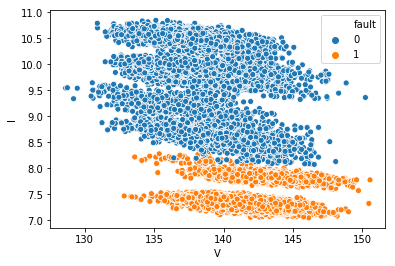

In [42]:
sns.scatterplot(x="V", y="I", hue="fault", data=train_total)

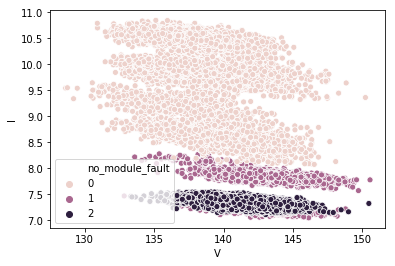

In [47]:
sns.scatterplot(x="V", y="I", hue="no_module_fault", data=train_total)

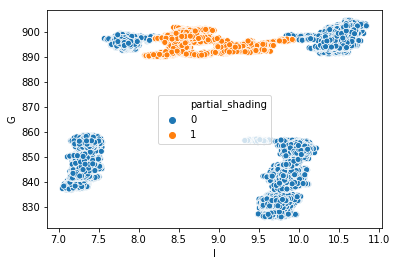

In [61]:
sns.scatterplot(x="I", y="G", hue="partial_shading", data=train_total)

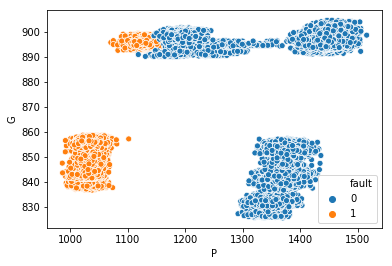

In [60]:
sns.scatterplot(x='P', y='G', hue='fault', data=train_total)

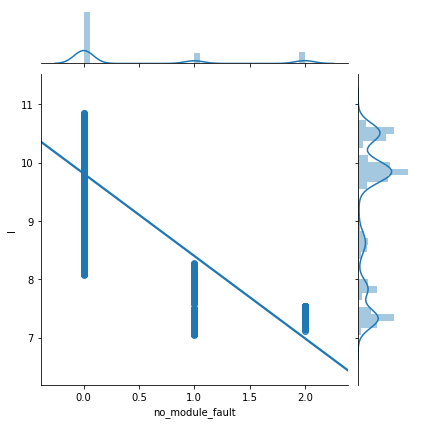

In [49]:
sns.jointplot("no_module_fault", "I", data=train_total, kind='reg');

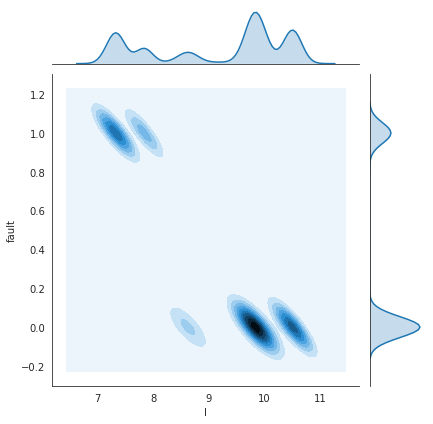

In [65]:
with sns.axes_style('white'):
    sns.jointplot("I", "fault", train_total, kind='kde');

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_shuffled = train_total.sample(frac=1)
train_shuffled_X = train_shuffled.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
train_shuffled_y = train_shuffled['fault']
train_shuffled_y_partial = train_shuffled['partial_shading']
train_shuffled_y_modules = train_shuffled['no_module_fault']
print(train_shuffled_X)
print(train_shuffled_y)

               V         I          G            P
2737   141.24092   9.63328  831.40201  1360.613330
23072  139.71086   7.36477  847.16716  1028.938350
41141  135.38075  10.57156  894.50989  1431.185721
25338  135.56584   9.95433  853.04673  1349.467108
9889   141.24451   7.26446  839.87816  1026.065093
44002  137.88608   9.68272  894.47859  1335.112305
19360  142.99504   7.32438  856.57307  1047.350011
14110  139.90466   7.19111  839.38784  1006.069800
6508   140.32724   9.79152  841.71404  1374.016977
25138  141.15983   7.38850  855.57008  1042.959404
22657  139.90699   7.42536  856.54050  1038.859767
12673  140.93045   9.76418  840.38189  1376.070281
29335  142.06602   7.83971  894.33382  1113.756398
39591  139.23185   8.54544  898.95257  1189.797420
39128  136.57807  10.60304  899.97706  1448.142739
36123  141.12577   7.82300  893.68978  1104.026899
34620  140.56193   7.96018  896.01129  1118.898264
1372   138.36150   9.77595  830.59659  1352.615106
20113  137.81578  10.03414  855

In [21]:
test_total_X = test_total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
test_total_y = test_total['fault']
test_total_y_partial = test_total['partial_shading']
test_total_y_modules = test_total['no_module_fault']
print(test_total_X)
print(test_total_y)

               V         I          G            P
0      135.46148   9.83252  830.30470  1331.927711
1      141.65762   9.74323  833.86318  1380.202773
2      138.34277   9.93503  834.56130  1374.439570
3      135.19808   9.78742  829.19696  1323.240392
4      139.34999   9.81951  832.07670  1368.348620
5      136.80593   9.82740  831.97280  1344.446596
6      140.06258   9.67282  828.86163  1354.800125
7      139.74508   9.66304  832.28982  1350.362298
8      136.09972   9.84867  830.94597  1340.401229
9      142.34627   9.80659  832.26853  1395.931508
10     137.79321   9.73964  831.56807  1342.056260
11     138.14649   9.81321  831.62130  1355.660517
12     144.55526   9.52616  827.09580  1377.056536
13     137.14874   9.82214  830.94000  1347.094125
14     142.90996   9.62549  830.72433  1375.578391
15     140.19407   9.63758  831.53635  1351.131565
16     138.30020   9.67410  832.17038  1337.929965
17     138.32177   9.82283  835.02415  1358.711232
18     138.06460   9.75931  832

## General classification models

In [28]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()
model_GNB.fit(train_shuffled_X, train_shuffled_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
predict_GNB = model_GNB.predict(test_total_X)
acc_GNB = accuracy_score(test_total_y, predict_GNB)
print("Accuracy:", acc_GNB*100, "%")

Accuracy: 99.81546572934974 %


In [30]:
model_GNB_partial = GaussianNB()
model_GNB_partial.fit(train_shuffled_X, train_shuffled_y_partial)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
predict_GNB_partial = model_GNB_partial.predict(test_total_X)
acc_GNB_partial = accuracy_score(test_total_y_partial, predict_GNB_partial)
print("Accuracy:", acc_GNB_partial*100, "%")

Accuracy: 99.09490333919156 %


In [32]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression()
model_LogReg.fit(train_shuffled_X, train_shuffled_y)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predict_LogReg = model_LogReg.predict(test_total_X)
acc_LogReg = accuracy_score(test_total_y, predict_LogReg)
print("Accuracy:", acc_LogReg*100, "%")

Accuracy: 99.98242530755712 %


In [34]:
model_LogReg_partial = LogisticRegression()
model_LogReg_partial.fit(train_shuffled_X, train_shuffled_y_partial)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predict_LogReg_partial = model_LogReg_partial.predict(test_total_X)
acc_LogReg_partial = accuracy_score(test_total_y_partial, predict_LogReg_partial)
print("Accuracy:", acc_LogReg_partial*100, "%" )

Accuracy: 92.62741652021089 %


In [36]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(train_shuffled_X, train_shuffled_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predict_DT = model_DT.predict(test_total_X)
acc_DT = accuracy_score(test_total_y, predict_DT)
print("Accuracy:", acc_DT*100, "%")
print("Precision:", precision_score(test_total_y, predict_DT)*100, "%")
print("Recall:", recall_score(test_total_y, predict_DT)*100, "%")
print("F1:", f1_score(test_total_y, predict_DT)*100, "%")

Accuracy: 99.99121265377856 %
Precision: 100.0 %
Recall: 99.97070884592853 %
F1: 99.98535227772082 %


[Text(213.05454545454546, 199.32, 'X[3] <= 1158.057\nentropy = 0.417\nsamples = 45520\nvalue = [32024, 13496]'),
 Text(152.1818181818182, 163.07999999999998, 'X[1] <= 8.273\nentropy = 0.005\nsamples = 13520\nvalue = [32, 13488]'),
 Text(121.74545454545455, 126.83999999999999, 'X[1] <= 8.124\nentropy = 0.002\nsamples = 13502\nvalue = [14, 13488]'),
 Text(60.872727272727275, 90.6, 'X[1] <= 8.065\nentropy = 0.0\nsamples = 13454\nvalue = [2, 13452]'),
 Text(30.436363636363637, 54.359999999999985, 'entropy = 0.0\nsamples = 13436\nvalue = [0, 13436]'),
 Text(91.30909090909091, 54.359999999999985, 'X[2] <= 893.335\nentropy = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(60.872727272727275, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(121.74545454545455, 18.119999999999976, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(182.61818181818182, 90.6, 'X[2] <= 893.768\nentropy = 0.375\nsamples = 48\nvalue = [12, 36]'),
 Text(152.1818181818182, 54.359999999999985, 

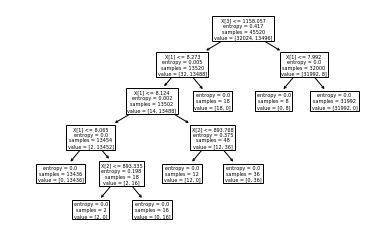

In [16]:
from sklearn import tree
tree.plot_tree(model_DT)

# import graphviz
# dot_data = tree.export_graphviz(model_DT, out_file=None)
# graph = graphviz.Source(dot_data) 
# graph.render("solar") 

In [17]:
model_DT_partial = DecisionTreeClassifier()
model_DT_partial.fit(train_shuffled_X, train_shuffled_y_partial)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predict_DT_partial = model_DT_partial.predict(test_total_X)
acc_DT_partial = accuracy_score(test_total_y_partial, predict_DT_partial)
print("Accuracy:", acc_DT_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_DT_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_DT_partial)*100, "%")

Accuracy: 99.91212653778558 %
Precision: 99.39862542955326 %
Recall: 99.74137931034483 %
F1: 99.56970740103272 %


[Text(150.8821187868576, 209.07692307692307, 'X[3] <= 1318.498\nentropy = 0.182\nsamples = 45520\nvalue = [40900, 4620]'),
 Text(63.1804549283909, 192.35076923076923, 'X[3] <= 1157.868\nentropy = 0.375\nsamples = 18134\nvalue = [13597, 4537]'),
 Text(45.128896377422066, 175.62461538461537, 'X[1] <= 8.273\nentropy = 0.005\nsamples = 13518\nvalue = [13487, 31]'),
 Text(36.103117101937656, 158.89846153846153, 'X[1] <= 8.124\nentropy = 0.002\nsamples = 13501\nvalue = [13487, 14]'),
 Text(18.051558550968828, 142.1723076923077, 'X[1] <= 8.065\nentropy = 0.0\nsamples = 13453\nvalue = [13451, 2]'),
 Text(9.025779275484414, 125.44615384615385, 'entropy = 0.0\nsamples = 13435\nvalue = [13435, 0]'),
 Text(27.077337826453242, 125.44615384615385, 'X[2] <= 893.335\nentropy = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(18.051558550968828, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(36.103117101937656, 108.72, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(54.154675652906484

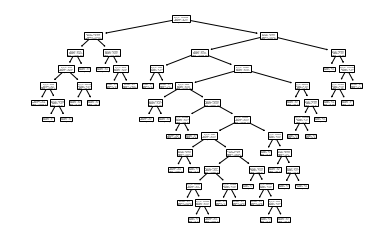

In [19]:
tree.plot_tree(model_DT_partial)

In [20]:
model_DT_modules = DecisionTreeClassifier()
model_DT_modules.fit(train_shuffled_X, train_shuffled_y_modules)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
predict_DT_modules = model_DT_modules.predict(test_total_X)
print("Accuracy:", accuracy_score(test_total_y_modules, predict_DT_modules)*100, "%")

Accuracy: 99.67486818980667 %


[Text(283.39728260869566, 210.645, 'X[3] <= 1157.868\nentropy = 0.461\nsamples = 45520\nvalue = [32024, 6559, 6937]'),
 Text(244.0491847826087, 197.055, 'X[2] <= 892.491\nentropy = 0.502\nsamples = 13518\nvalue = [31, 6550, 6937]'),
 Text(176.27038043478262, 183.465, 'X[2] <= 841.839\nentropy = 0.371\nsamples = 9192\nvalue = [23, 2232, 6937]'),
 Text(51.63016304347826, 169.875, 'X[2] <= 841.366\nentropy = 0.065\nsamples = 2238\nvalue = [0, 2163, 75]'),
 Text(10.917391304347827, 156.285, 'X[2] <= 841.277\nentropy = 0.003\nsamples = 2032\nvalue = [0, 2029, 3]'),
 Text(7.278260869565218, 142.695, 'entropy = 0.0\nsamples = 1993\nvalue = [0, 1993, 0]'),
 Text(14.556521739130435, 142.695, 'X[1] <= 7.208\nentropy = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(7.278260869565218, 129.10500000000002, 'X[3] <= 1028.359\nentropy = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(3.639130434782609, 115.515, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(10.917391304347827, 115.515, 'entr

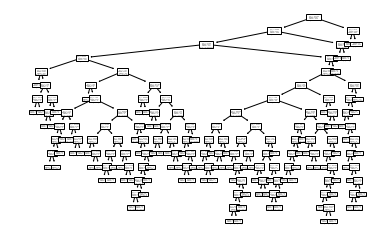

In [27]:
tree.plot_tree(model_DT_modules)

## Ensemble methods

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(train_shuffled_X, train_shuffled_y)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
predict_RF = model_RF.predict(test_total_X)
acc_RF = accuracy_score(test_total_y, predict_RF)
print("Accuracy:", acc_RF*100, "%")
print("Precision:", precision_score(test_total_y, predict_RF)*100, "%")
print("Recall:", recall_score(test_total_y, predict_RF)*100, "%")
print("F1:", f1_score(test_total_y, predict_RF)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 100.0 %
Recall: 99.94141769185705 %
F1: 99.97070026369762 %


In [43]:
model_RF_partial = RandomForestClassifier()
model_RF_partial.fit(train_shuffled_X, train_shuffled_y_partial)

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
predict_RF_partial = model_RF_partial.predict(test_total_X)
acc_RF_partial = accuracy_score(test_total_y_partial, predict_RF_partial)
print("Accuracy:", acc_RF_partial*100, "%")
print("Precision:", precision_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("Recall:", recall_score(test_total_y_partial, predict_RF_partial)*100, "%")
print("F1:", f1_score(test_total_y_partial, predict_RF_partial)*100, "%")

Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1: 100.0 %


In [71]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GBM = GradientBoostingClassifier(n_estimators=109)
model_GBM.fit(train_shuffled_X, train_shuffled_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=109,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
# for n_estimators=100 (default)
predict_GBM = model_GBM.predict(test_total_X)
# acc_GBM = accuracy_score(test_total_y, predict_GBM)
print("Accuracy:", acc_GBM*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

Accuracy: 99.97363796133568 %
Precision: 100.0 %
Recall: 99.91212653778558 %
F1: 99.95604395604396 %


In [57]:
# for n_estimators=120
predict_GBM = model_GBM.predict(test_total_X)
print("Accuracy:", accuracy_score(test_total_y, predict_GBM)*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 100.0 %
Recall: 99.94141769185705 %
F1: 99.97070026369762 %


In [73]:
# for n_estimators=109
predict_GBM = model_GBM.predict(test_total_X)
acc_GBM = accuracy_score(test_total_y, predict_GBM)
print("Accuracy:", accuracy_score(test_total_y, predict_GBM)*100, "%")
print("Precision:", precision_score(test_total_y, predict_GBM)*100, "%")
print("Recall:", recall_score(test_total_y, predict_GBM)*100, "%")
print("F1:", f1_score(test_total_y, predict_GBM)*100, "%")

Accuracy: 99.98242530755712 %
Precision: 100.0 %
Recall: 99.94141769185705 %
F1: 99.97070026369762 %


## Cross Validation

In [81]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
# KF = KFold(10, True)
SSS = StratifiedKFold(n_splits=10)

In [85]:
total = pd.concat([train_total, test_total], ignore_index=True)
total_X = total.drop(['no_module_fault', 'fault', 'partial_shading'], axis=1)
total_y = total['fault']
total_y_partial = total['partial_shading']
total_y_modules = total['no_module_fault']
total_X.describe()

,V,I,G,P
count,56900.000000,56900.000000,56900.000000,56900.000000
mean,139.561242,9.176205,865.900578,1278.678733
std,2.606393,1.209647,26.898051,155.894604
min,128.633120,7.047240,825.585240,986.645824
25%,137.745132,7.838890,841.572510,1122.878942
50%,139.388985,9.768640,854.799790,1355.387947
75%,141.274195,10.020325,896.008627,1393.583022
max,150.549000,10.847240,904.615830,1515.478445


In [87]:
# Naive Bayes
model_GNB_crossval = GaussianNB()
predict_GNB_crossval = cross_val_score(model_GNB_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GNB = predict_GNB_crossval.mean()
print("Cross validated accuracies:", predict_GNB_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GNB*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         0.9970123
 0.99367311 0.99613357 1.         0.99648506]
Average cross validated accuracy: 99.83304042179262 %


In [88]:
# Logistic Regression
model_LogReg_crossval = LogisticRegression()
predict_LogReg_crossval = cross_val_score(model_LogReg_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_LogReg = predict_LogReg_crossval.mean()
print("Cross validated accuracies:", predict_LogReg_crossval)
print("Average cross validated accuracy:", avg_crossval_score_LogReg*100, "%")

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Cross validated accuracies: [1.         1.         1.         1.         1.         0.99982425
 0.99789104 0.99912127 1.         0.99964851]
Average cross validated accuracy: 99.96485061511426 %


In [89]:
# Decision Trees
model_DT_crossval = DecisionTreeClassifier()
predict_DT_crossval = cross_val_score(model_DT_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_DT = predict_DT_crossval.mean()
print("Cross validated accuracies:", predict_DT_crossval)
print("Average cross validated accuracy:", avg_crossval_score_DT*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         1.
 0.99912127 1.         1.         0.99982425]
Average cross validated accuracy: 99.98945518453426 %


In [90]:
# Random Forest
model_RF_crossval = RandomForestClassifier()
predict_RF_crossval = cross_val_score(model_RF_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_RF = predict_RF_crossval.mean()
print("Cross validated accuracies:", predict_RF_crossval)
print("Average cross validated accuracy:", avg_crossval_score_RF*100, "%")

/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sprince0031/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sprince0031/.local/lib/python3

Cross validated accuracies: [1.         1.         1.         1.         1.         1.
 0.99912127 0.99964851 1.         1.        ]
Average cross validated accuracy: 99.98769771528998 %


In [91]:
# Gradient Boosting Machine
model_GBM_crossval = GradientBoostingClassifier()
predict_GBM_crossval = cross_val_score(model_GBM_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GBM = predict_GBM_crossval.mean()
print("Cross validated accuracies:", predict_GBM_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GBM*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         1.
 0.99841828 0.99894552 1.         0.99947276]
Average cross validated accuracy: 99.96836555360282 %


In [92]:
# Gradient Boosting Machine with n_estimators=109
model_GBM_crossval = GradientBoostingClassifier(n_estimators=109)
predict_GBM_crossval = cross_val_score(model_GBM_crossval, total_X, total_y, cv=SSS.split(total_X, total_y))
avg_crossval_score_GBM = predict_GBM_crossval.mean()
print("Cross validated accuracies:", predict_GBM_crossval)
print("Average cross validated accuracy:", avg_crossval_score_GBM*100, "%")

Cross validated accuracies: [1.         1.         1.         1.         1.         1.
 0.99859402 0.99912127 1.         0.99964851]
Average cross validated accuracy: 99.97363796133568 %


## Finding the best algorithm

In [96]:
AccList = [['Naive Bayes', acc_GNB],
           ['Logistic Regression', acc_LogReg],
           ['Decision Tree', acc_DT],
           ['Random Forest', acc_RF],
           ['Gradient Boosting Classifier', acc_GBM]
          ]

acc_results = pd.DataFrame(AccList, columns = ['Classification Model', 'Accuracy Score'])
acc_results.sort_values(by=['Accuracy Score'], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()

,Classification Model,Accuracy Score
2,Decision Tree,0.999912
1,Logistic Regression,0.999824
3,Random Forest,0.999824
4,Gradient Boosting Classifier,0.999824
0,Naive Bayes,0.998155


In [97]:
# For cross-validated scores
AccList_Crossval = [['Naive Bayes', avg_crossval_score_GNB],
           ['Logistic Regression', avg_crossval_score_LogReg],
           ['Decision Tree', avg_crossval_score_DT],
           ['Random Forest', avg_crossval_score_RF],
           ['Gradient Boosting Classifier', avg_crossval_score_GBM]
          ]

acc_results = pd.DataFrame(AccList_Crossval, columns = ['Classification Model', 'Accuracy Score'])
acc_results.sort_values(by=['Accuracy Score'], inplace=True, ascending=False) # Sorting records in order of highest accuracy
acc_results.head()

,Classification Model,Accuracy Score
2,Decision Tree,0.999895
3,Random Forest,0.999877
4,Gradient Boosting Classifier,0.999736
1,Logistic Regression,0.999649
0,Naive Bayes,0.998330
